# Analysis of the UN's World Happiness Index with machine learning

Maaike de Jong  
June 2020  
  
See the repository's [README](https://github.com/maaikedj/happiness-machine-learning/blob/master/README.md) file for background and details on the analysis and data.  

### Notebook 3: Supervised machine learning: linear regression
In this notebook I perform a linear regression analysis with scikit-learn, optimising the model with recursive feature elimination. 

In [1]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler

In [2]:
# import data

df = pd.read_csv('dfML_clean_tr.csv')
df.head()

,Score mean,CO2 emissions (metric tons per capita) log,GDP per capita (current US$) log,Individuals using the Internet (% of population),Land area (sq. km) log,"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) log",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area) log,Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population log
0,7.5114,0.675108,4.917220,86.791615,4.596773,83.026287,1.066573,100.000000,2.316057,1.052495,6.0,30.800,22.946425,7.0,9.660123,73.697333,-5.736739
1,7.5110,0.772409,4.743932,96.981917,5.001084,82.454472,0.856043,99.999999,0.517619,1.133978,7.0,41.440,76.467214,7.0,17.914355,93.675778,-5.066406
2,7.5460,0.845305,4.768797,94.347397,4.624156,80.440108,1.043249,99.999999,2.128672,0.531352,6.9,38.311,27.220085,6.0,17.921347,87.377222,-5.863501
3,7.5410,1.017703,4.944372,95.537903,5.562487,81.969919,0.886375,100.000000,1.146877,1.059666,7.0,39.903,57.320681,6.0,17.060995,80.678222,-5.709362
4,7.3506,1.182819,4.681754,86.422500,6.958732,81.732249,0.878417,99.353377,0.590806,1.078803,6.0,25.365,22.181059,6.0,9.687049,81.209556,-5.580018


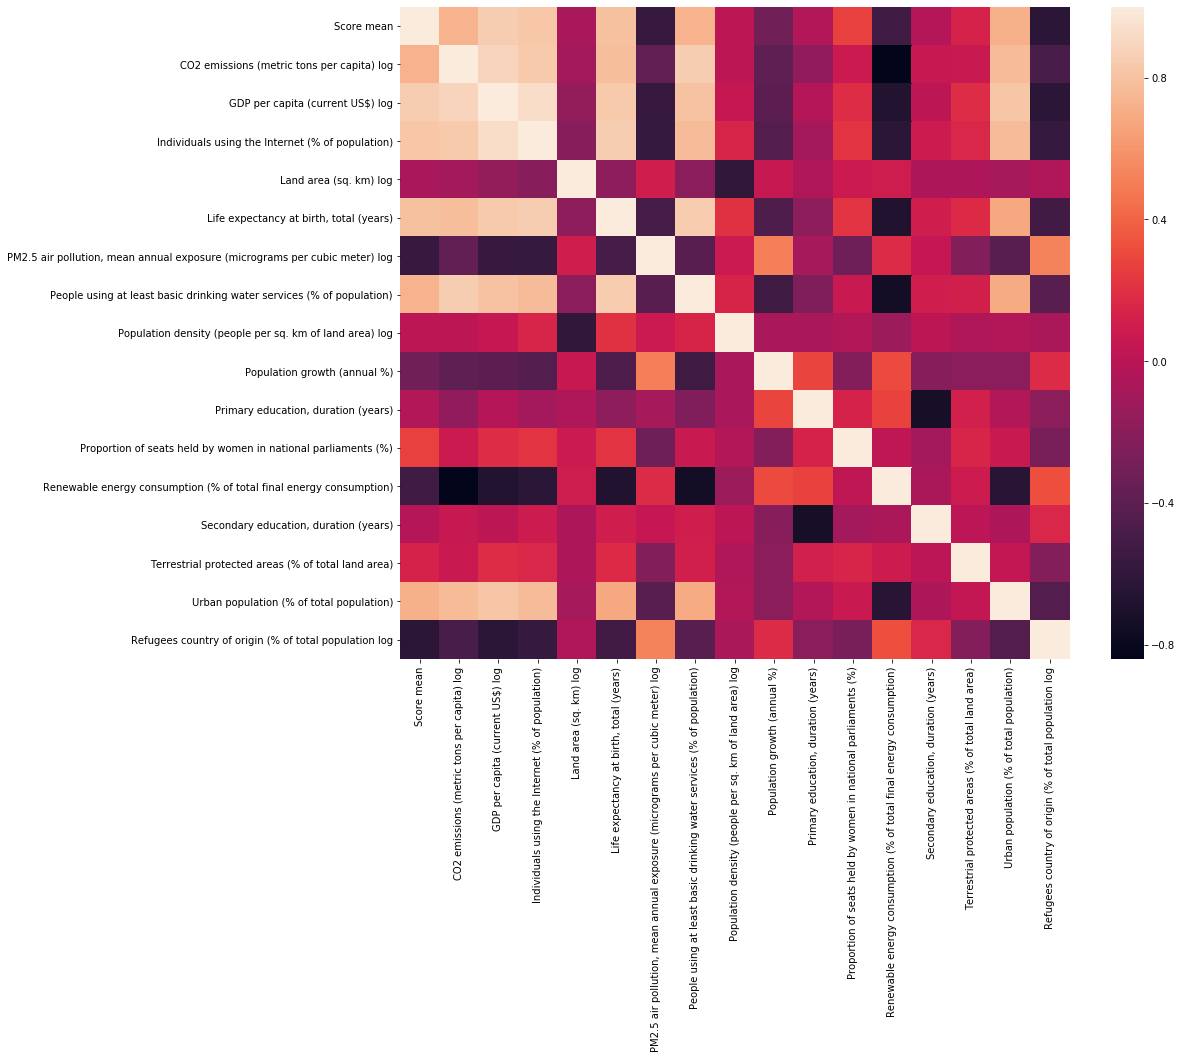

In [4]:
# check correlations between variables with heatmap

corr = df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr)

### Linear regression  

* Build a model with 80% train, 20 % test data
* Calculate train and test R2 scores
* Average R2 scores over 1000 model runs

Try different ways of scaling the data to check which gives the best results

In [5]:
# model with unscaled data

score_list = []

for i in range(1000):
    y = df['Score mean']
    X = df.drop(['Score mean'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    LM = linear_model.LinearRegression()
    
    LM.fit(X_train, y_train)
    
    y_pred = LM.predict(X_train)
    r2score_train = r2_score(y_train, y_pred)
    
    y_test_pred = LM.predict(X_test)
    r2score_test = r2_score(y_test, y_test_pred)
    
    score_list.append((r2score_train, r2score_test))

In [6]:
# Create df with R2 scores

score_df = pd.DataFrame(score_list, columns=('r2score_train', 'r2score_test'))
score_df.head()

,r2score_train,r2score_test
0,0.823897,0.694430
1,0.803395,0.792659
2,0.804698,0.802607
3,0.807413,0.769063
4,0.838605,0.637354


In [7]:
# print train and test score means

print(score_df.mean())

# The unscaled data performs pretty well, although there is an indication of overfitting, which is not surprising with so many variables

r2score_train    0.814416
r2score_test     0.735631
dtype: float64


In [18]:
# define function to run model with df, test size and scaling method as input
# fit scaler on training data only, use to standardise both training and test sets


def linear_regression(df, test_size, scalertype):
    
    score_list = []

    for i in range(1000):
        y = df['Score mean']
        X = df.drop(['Score mean'], axis=1)
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        
        scaler = scalertype()

        X_train_scaled = scaler.fit_transform(X_train)

        X_test_scaled = scaler.transform(X_test)
    
        LM = linear_model.LinearRegression()
    
        LM.fit(X_train_scaled, y_train)
    
        y_pred = LM.predict(X_train_scaled)
        r2score_train = r2_score(y_train, y_pred)
    
        y_test_pred = LM.predict(X_test_scaled)
        r2score_test = r2_score(y_test, y_test_pred)
    
        score_list.append((r2score_train, r2score_test))
    
    score_df = pd.DataFrame(score_list, columns=('r2score_train', 'r2score_test'))
    
    return print(score_df.mean())

In [19]:
# Compare different scalers
# Run model with MinMaxScaler

linear_regression(df, 0.20, MinMaxScaler)

r2score_train    0.815099
r2score_test     0.729828
dtype: float64


In [21]:
# Now with StandardScaler

linear_regression(df, 0.20, StandardScaler)

r2score_train    0.815023
r2score_test     0.729869
dtype: float64


In [22]:
# Now with RobustScaler

linear_regression(df, 0.20, RobustScaler)

r2score_train    0.814584
r2score_test     0.732376
dtype: float64


In [ ]:
# Different types of scaling don't give different results and are similar to the unscaled data
# I could investigate this visually and/or with PCA as a next step
# for now I go with the MinMaxScaler as it doesn’t distort the distances between the values in each feature 

### Recursive feature elimination

In [23]:
# run model again with MinMaxScaler

score_list = []

for i in range(1000):
    y = df['Score mean']
    X = df.drop(['Score mean'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        
    scaler = MinMaxScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)
    
    LM = linear_model.LinearRegression()
    
    LM.fit(X_train_scaled, y_train)
    
    y_pred = LM.predict(X_train_scaled)
    r2score_train = r2_score(y_train, y_pred)
    
    y_test_pred = LM.predict(X_test_scaled)
    r2score_test = r2_score(y_test, y_test_pred)
    
    score_list.append((r2score_train, r2score_test))
    
score_df = pd.DataFrame(score_list, columns=('r2score_train', 'r2score_test'))

print(score_df.mean())

r2score_train    0.814958
r2score_test     0.729357
dtype: float64


In [24]:
# eliminate least important variables one by one
# collect R2 scores in dataframe
# first select 15 most important features

selector = RFE(LM, n_features_to_select=1, step=1)

selector = selector.fit(X, y)

selector.ranking_

array([ 3,  1, 13, 10,  9,  2, 11,  8,  7,  4, 12, 14,  5, 15, 16,  6])

In [25]:
df.head()

,Score mean,CO2 emissions (metric tons per capita) log,GDP per capita (current US$) log,Individuals using the Internet (% of population),Land area (sq. km) log,"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) log",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area) log,Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population log
0,7.5114,0.675108,4.917220,86.791615,4.596773,83.026287,1.066573,100.000000,2.316057,1.052495,6.0,30.800,22.946425,7.0,9.660123,73.697333,-5.736739
1,7.5110,0.772409,4.743932,96.981917,5.001084,82.454472,0.856043,99.999999,0.517619,1.133978,7.0,41.440,76.467214,7.0,17.914355,93.675778,-5.066406
2,7.5460,0.845305,4.768797,94.347397,4.624156,80.440108,1.043249,99.999999,2.128672,0.531352,6.9,38.311,27.220085,6.0,17.921347,87.377222,-5.863501
3,7.5410,1.017703,4.944372,95.537903,5.562487,81.969919,0.886375,100.000000,1.146877,1.059666,7.0,39.903,57.320681,6.0,17.060995,80.678222,-5.709362
4,7.3506,1.182819,4.681754,86.422500,6.958732,81.732249,0.878417,99.353377,0.590806,1.078803,6.0,25.365,22.181059,6.0,9.687049,81.209556,-5.580018


In [ ]:
# Order of importance of variables standard scaled

# 1: GDP per capita (current US$)
# 2: Life expectancy at birth, total (years)
# 3: Refugees country of origin (% of total population
# 4: Renewable energy consumption (% of total final energy consumption)
# 5: People using at least basic drinking water services (% of population)
# 6: Individuals using the Internet (% of population)
# 7: Population growth (annual %)

# 8: Primary education, duration (years)
# 9: Secondary education, duration (years)
# 10: CO2 emissions (metric tons per capita)
# 11: Population density (people per sq. km of land area)
# 12: Proportion of seats held by women in national parliaments (%)
# 13: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
# 14: Terrestrial protected areas (% of total land area)
# 15: Land area (sq. km)
# 16: Urban population (% of total population)

In [ ]:
# Order of importance of variables robust scaled
# up to 7 they're all the same

# 1: GDP per capita (current US$)
# 2: Life expectancy at birth, total (years)
# 3: Refugees country of origin (% of total population
# 4: Renewable energy consumption (% of total final energy consumption)
# 5: People using at least basic drinking water services (% of population)
# 6: Individuals using the Internet (% of population)
# 7: Population growth (annual %)

# 8: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
# 9: Proportion of seats held by women in national parliaments (%)
# 10: Primary education, duration (years)
# 11: Secondary education, duration (years)
# 12: CO2 emissions (metric tons per capita)
# 13: Population density (people per sq. km of land area)
# 14: Terrestrial protected areas (% of total land area)
# 15: Land area (sq. km)
# 16: Urban population (% of total population)

# overall, robust scaled performs slightly better as a model and it works better with outliers so we're going forward with this one


In [ ]:
dfscaled2_16 = df_scaled2.copy()
dfscaled2_16.head()

In [ ]:
dfscaled2_15 = dfscaled2_16.drop(['Urban population (% of total population)'], axis=1)
dfscaled2_14 = dfscaled2_15.drop(['Land area (sq. km)'], axis=1)
dfscaled2_13 = dfscaled2_14.drop(['Terrestrial protected areas (% of total land area)'], axis=1)
dfscaled2_12 = dfscaled2_13.drop(['Population density (people per sq. km of land area)'], axis=1)
dfscaled2_11 = dfscaled2_12.drop(['CO2 emissions (metric tons per capita)'], axis=1)
dfscaled2_10 = dfscaled2_11.drop(['Secondary education, duration (years)'], axis=1)
dfscaled2_9 = dfscaled2_10.drop(['Primary education, duration (years)'], axis=1)
dfscaled2_8 = dfscaled2_9.drop(['Proportion of seats held by women in national parliaments (%)'], axis=1)
dfscaled2_7 = dfscaled2_8.drop(['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'], axis=1)
dfscaled2_6 = dfscaled2_7.drop(['Population growth (annual %)'], axis=1)
dfscaled2_5 = dfscaled2_6.drop(['Individuals using the Internet (% of population)'], axis=1)
dfscaled2_4 = dfscaled2_5.drop(['People using at least basic drinking water services (% of population)'], axis=1)
dfscaled2_3 = dfscaled2_4.drop(['Renewable energy consumption (% of total final energy consumption)'], axis=1)
dfscaled2_2 = dfscaled2_3.drop(['Refugees country of origin (% of total population'], axis=1)
dfscaled2_1 = dfscaled2_2.drop(['Life expectancy at birth, total (years)'], axis=1)


In [ ]:
dfscaled2_2.head()

In [ ]:
linear_regression(dfscaled2_16, 0.20)

In [ ]:
linear_regression(dfscaled2_15, 0.20)

In [ ]:
linear_regression(dfscaled2_14, 0.20)

In [ ]:
linear_regression(dfscaled2_13, 0.20)

In [ ]:
linear_regression(dfscaled2_12, 0.20)

In [ ]:
linear_regression(dfscaled2_11, 0.20)

In [ ]:
linear_regression(dfscaled2_10, 0.20)

In [ ]:
linear_regression(dfscaled2_9, 0.20)

In [ ]:
linear_regression(dfscaled2_8, 0.20)

In [ ]:
linear_regression(dfscaled2_7, 0.20)

In [ ]:
linear_regression(dfscaled2_6, 0.20)

In [ ]:
linear_regression(dfscaled2_5, 0.20)

In [ ]:
linear_regression(dfscaled2_4, 0.20)

In [ ]:
linear_regression(dfscaled2_3, 0.20)

In [ ]:
linear_regression(dfscaled2_2, 0.20)

In [ ]:
linear_regression(dfscaled2_1, 0.20)

In [ ]:
# put into dataframe

data = [[1, 0.724442, 0.701563],
        [2, 0.746336, 0.719748],
        [3, 0.761416, 0.735143],
        [4, 0.769537, 0.736243],
        [5, 0.774668, 0.733050],
        [6, 0.775586, 0.731938],
        [7, 0.783696, 0.736203],
        [8, 0.791826, 0.735551],
        [9, 0.798138, 0.737627],
        [10, 0.798904, 0.740897],
        [11, 0.803905, 0.736488],
        [12, 0.803887, 0.736370],
        [13, 0.809217, 0.744408],
        [14, 0.813000, 0.737465],
        [15, 0.813834, 0.736007],
        [16, 0.814454, 0.733431]]

df_R2_scores = pd.DataFrame(data, columns = ['Nr of variables', 'R2_score_train', 'R2_score_test'])
df_R2_scores

In [ ]:
dfr2_melt = pd.melt(df_R2_scores, id_vars = ['Nr of variables'], value_vars = ['R2_score_train', 'R2_score_test'])
dfr2_melt

In [ ]:
sns.lineplot(x = 'Nr of variables', y = 'value', hue = 'variable', data = dfr2_melt, linewidth=2.5)

In [ ]:
sns.set()
sns.set_style('white')
sns.set_color_codes('pastel')

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Nr of variables', y = 'value', hue = 'variable', palette = 'Set2', data = dfr2_melt, linewidth=4)

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.set_xticks(range(0, 17, 2))

ax.legend(loc="lower right", frameon=True, fontsize = 20)

plt.xlabel('Number of variables', fontsize=30)
plt.ylabel('R2 score', fontsize=30)
plt.suptitle('R2 train and test scores recursive feature elimination', fontsize=36)

sns.despine()